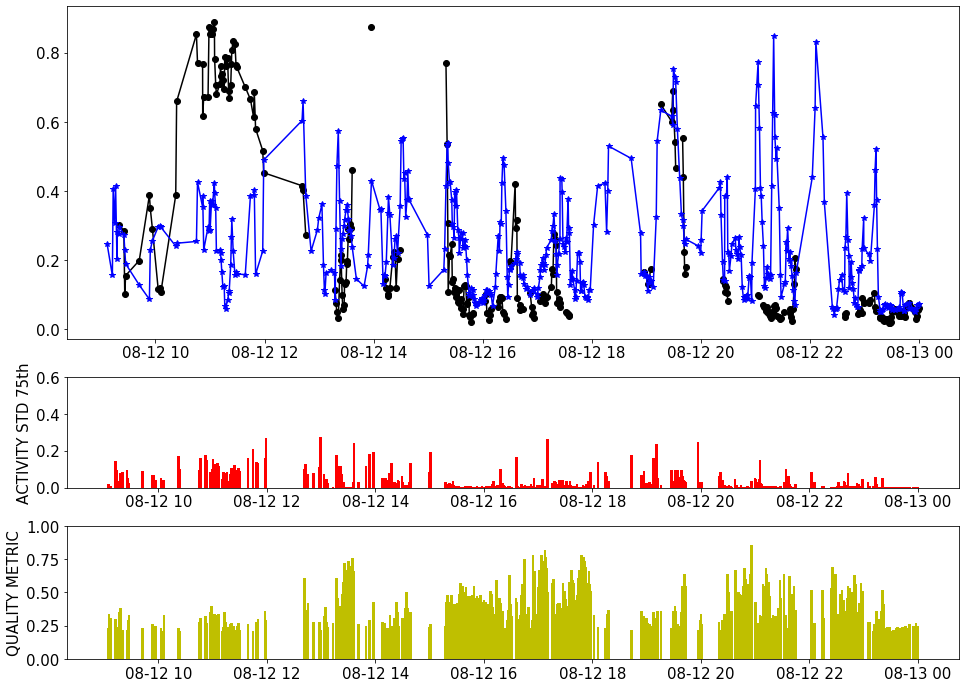


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



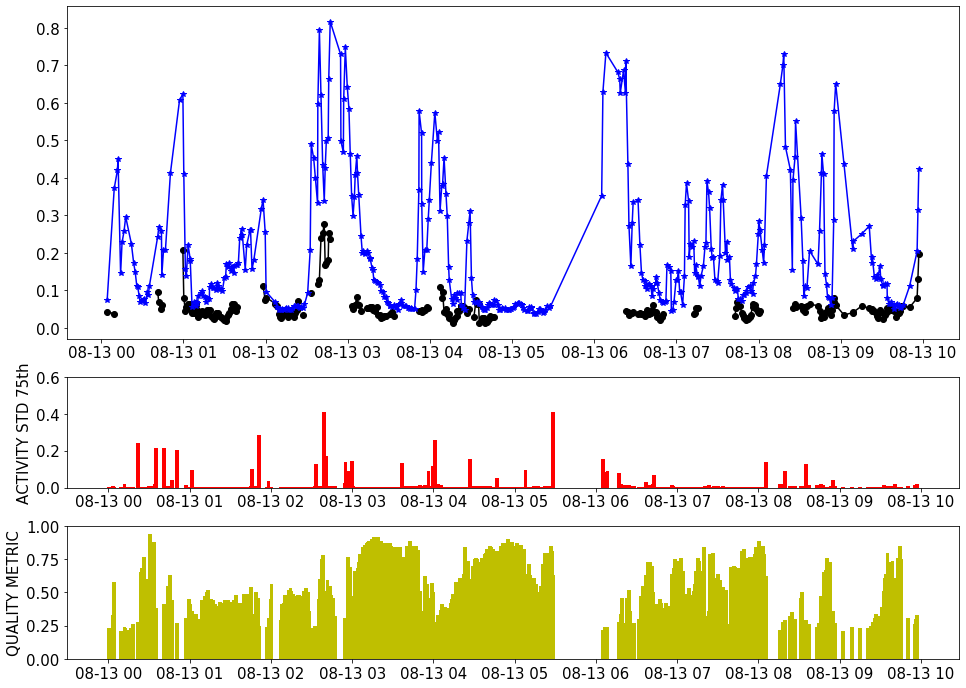


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



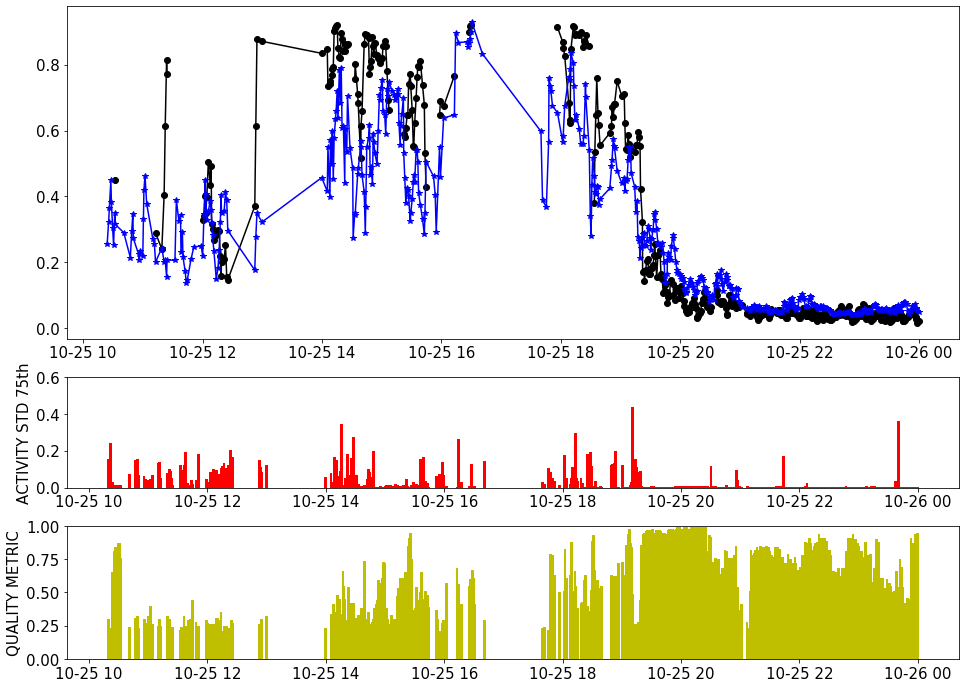


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



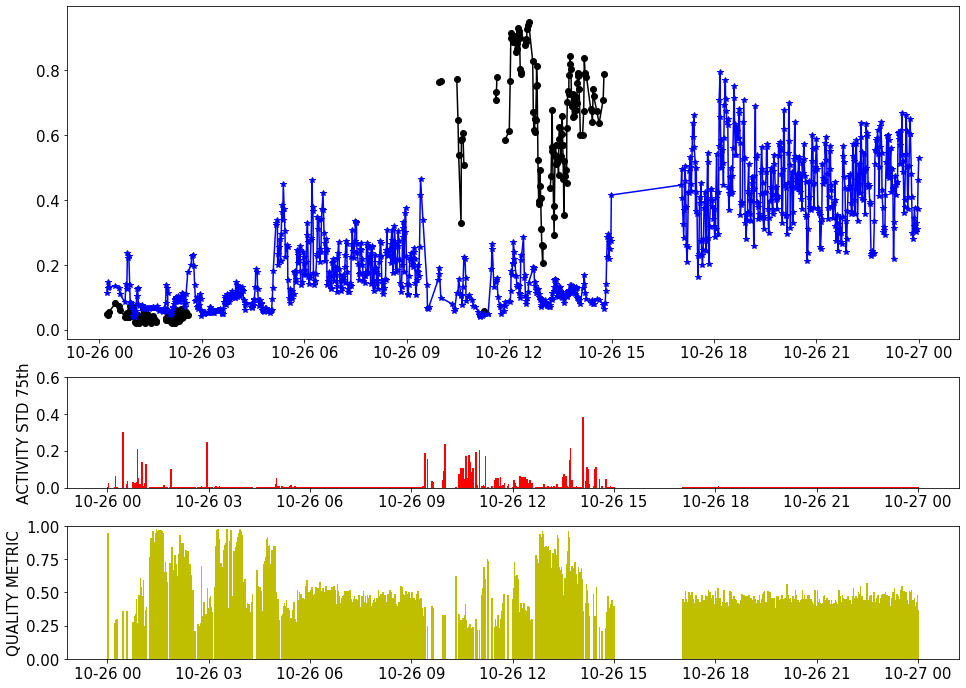


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



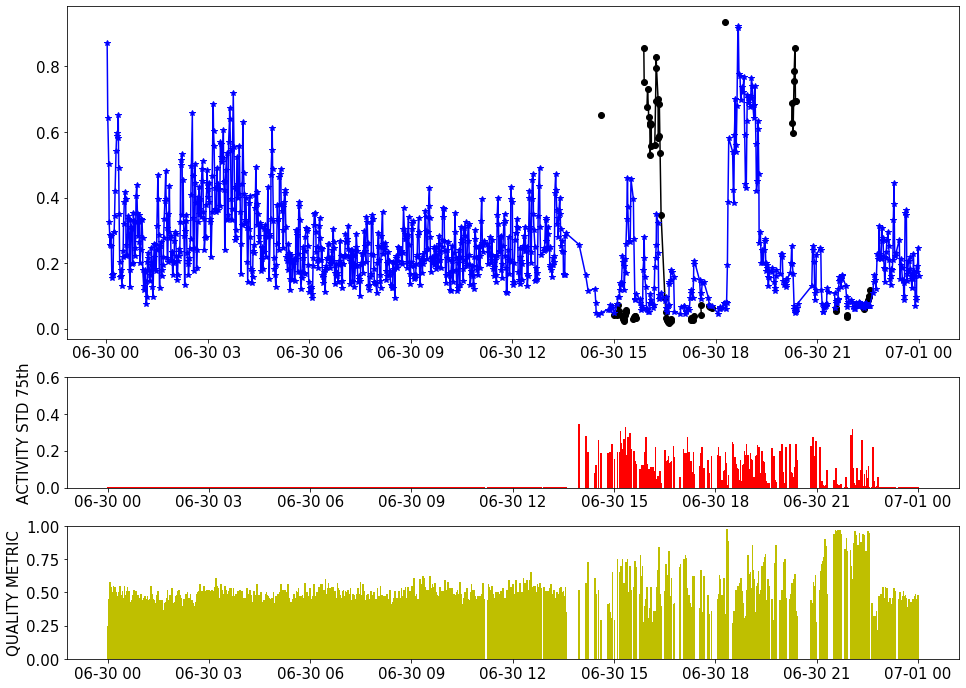


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



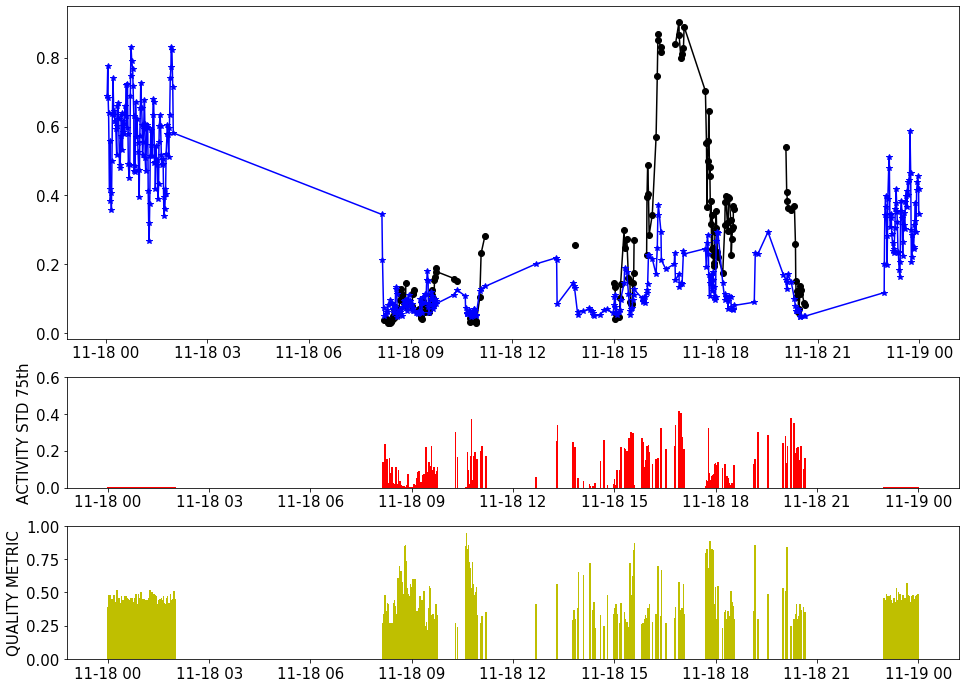


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



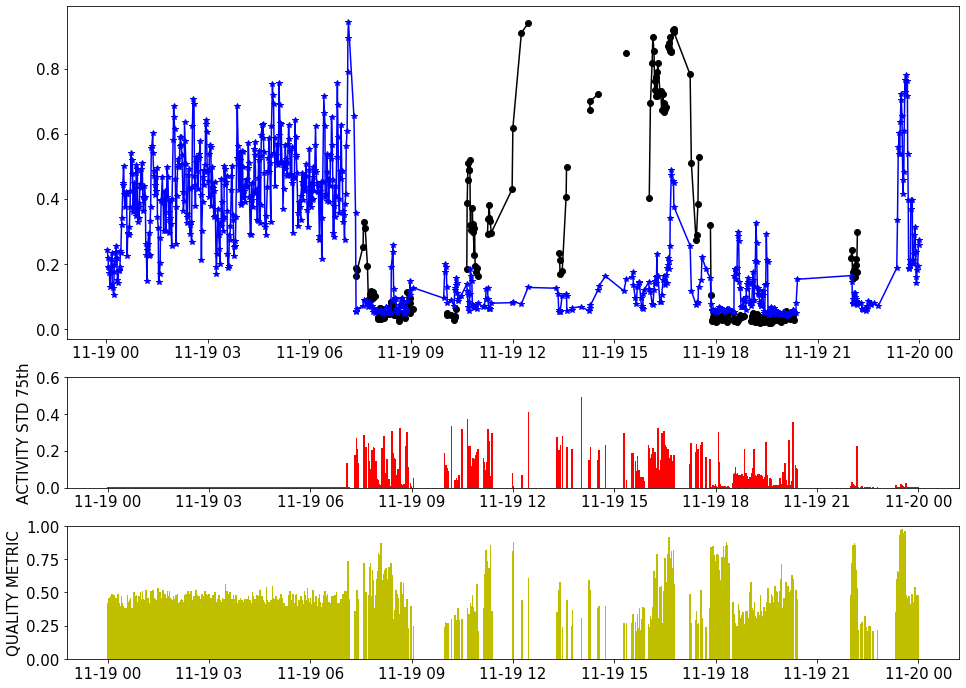


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



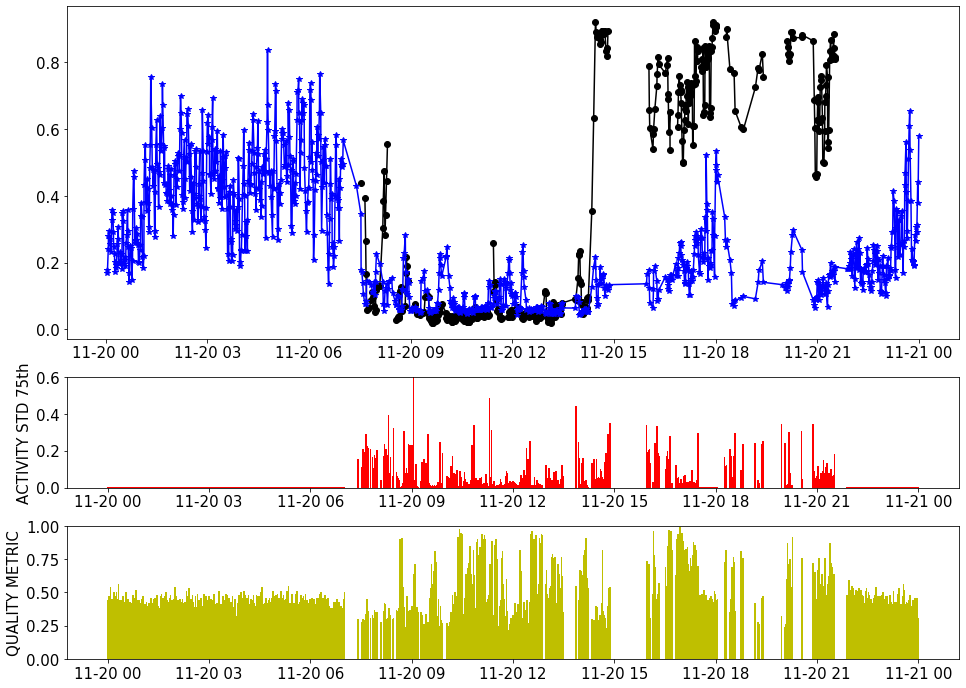


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



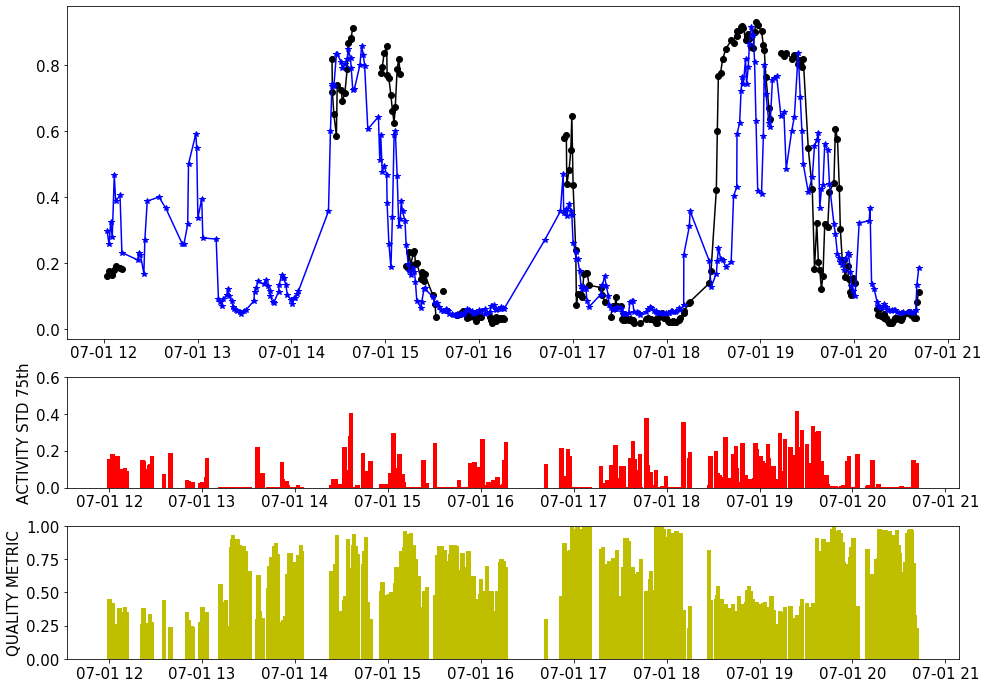


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



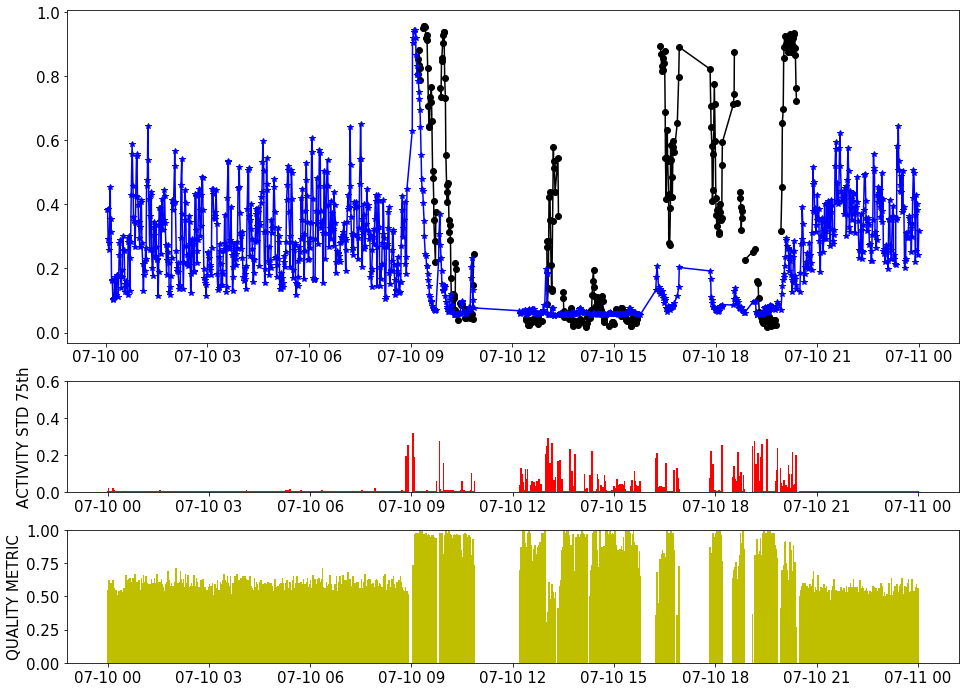


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



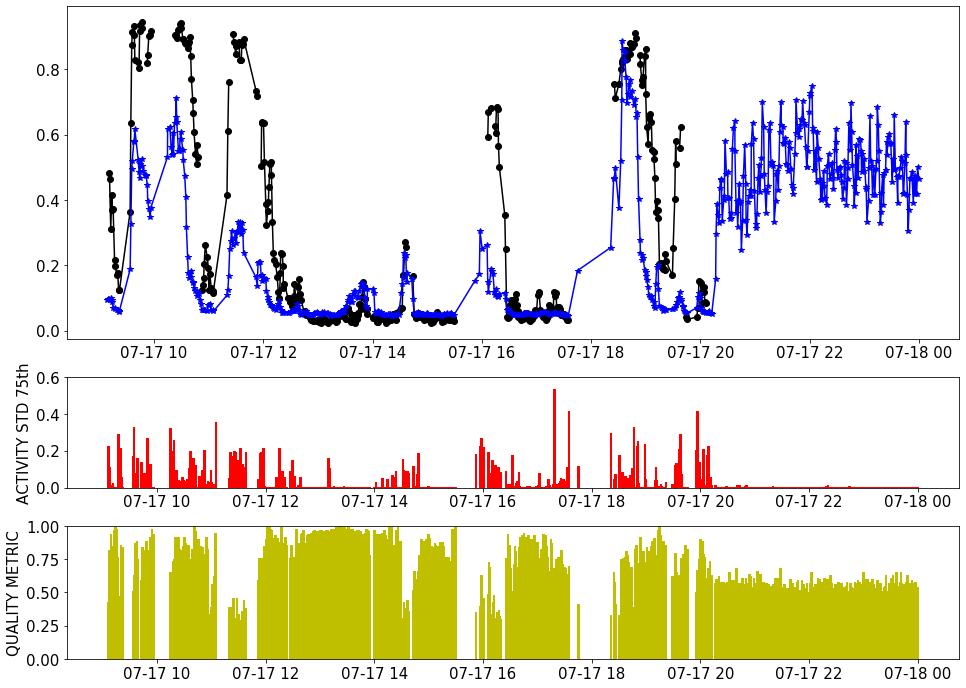


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



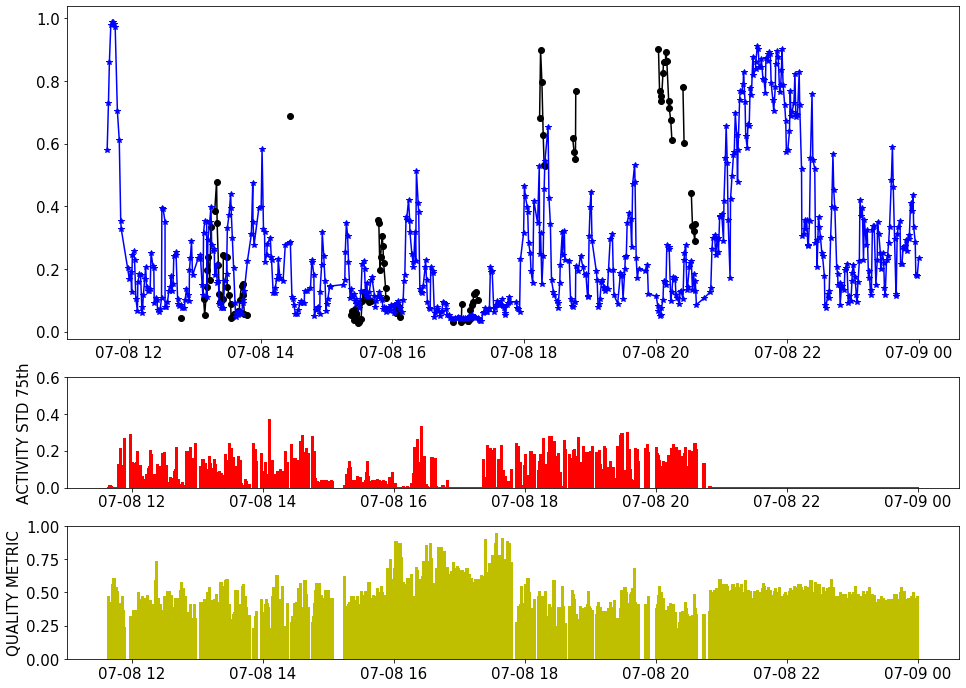


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



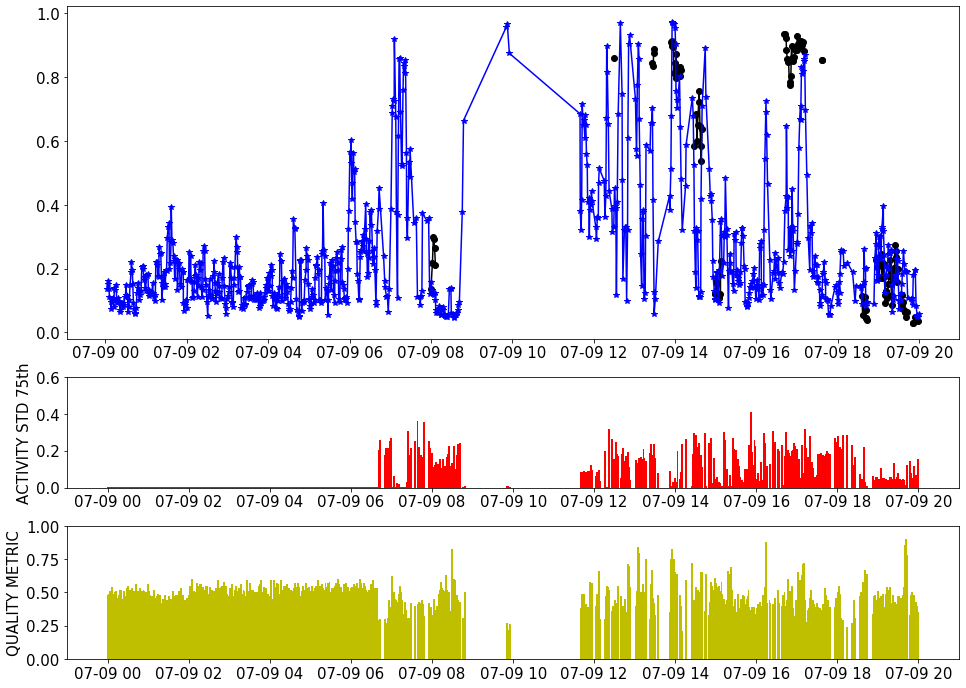


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



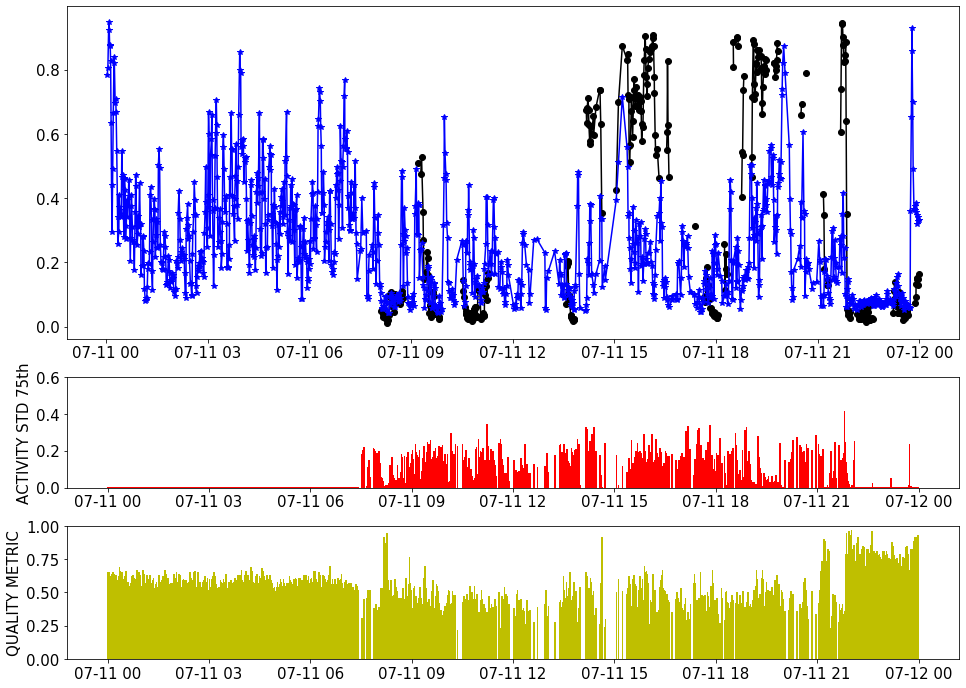


************************************************************************************************************************
------------------------------------------------------------------------------------------------------------------------



In [ ]:
from scipy.stats import iqr
from datetime import datetime
from copy import deepcopy
import math
from scipy.stats import pearsonr
from sklearn.externals.joblib import Parallel,delayed
import warnings
import pandas as pd
import pickle
import os
import numpy as np
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans,AgglomerativeClustering,AffinityPropagation,MeanShift
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size':15})

def parse_each_participant(directory,d):
    data = pickle.load(open(directory+d,'rb')).reset_index(drop=True)
    if data.shape[0]<1000:
        return 0
#     print(data.columns)
    data = data[['ltime','quality_mag_1','activity','user','day','all_features','stress_likelihood1','stress_likelihood2','stress_likelihood_ecg']].reset_index(drop=True)
    data = data[data.quality_mag_1>.2]
    data['activity_features'] = data['activity'].apply(lambda a:np.percentile(a,75))
    
    for i,d in data.groupby(['day']):
#         print(d.shape)
        fig, ax = plt.subplots(3,1,figsize=(16,12),gridspec_kw={'height_ratios': [3, 1,1.2]})
        ax[0].plot(d['ltime'],d['stress_likelihood_ecg'].rolling(3).mean(),'o-k',label='ECG STRESS')
        ax[0].plot(d['ltime'],d['stress_likelihood2'].rolling(3).mean(),'*-b',label='PPG STRESS')
#         ax[0].plot(d['ltime'],d['stress_likelihood1'],'*-g',label='PPG STRESS')
#         ax[0].legend()
        ax[1].bar(d['ltime'],d['activity_features'],.002,color='r')
        ax[1].set_ylim([0,.6])
        ax[1].set_ylabel('ACTIVITY STD 75th')
        ax[2].bar(d['ltime'],d['quality_mag_1'],.002,color='y')
        ax[2].set_ylim([0,1])
        ax[2].set_ylabel('QUALITY METRIC')
        plt.show()
        print()
        print('*'*120)
        print('-'*120)
        print()
#     if len(np.unique(data['day'].values))<2:
#         return 0
#     X = np.array(list(data['all_features']))
#     y = np.array(list(data['stress_likelihood2']))
#     clf = MeanShift()
# #     clf.fit(X)
#     y_pred = clf.fit_predict(X)
#     data['cluster'] = y_pred
#     data = data.dropna()
#     if len(np.unique(data['day'].values))<2:
#         return 0
#     df = np.array([np.array([d.reset_index(drop=True)['cluster'].loc[0],pearsonr(d['stress_likelihood_ecg'].values,
#                                                  d['stress_likelihood2'].values)[0],d.shape[0]/60]) for i,d in data.groupby(['day','cluster']) if d.shape[0]>10])
#     d = pd.DataFrame(df,columns=['cluster','correlation','yield'])
#     fig, ax = plt.subplots(1,2,figsize=(16,8))
#     d.boxplot(column=['correlation'], by='cluster', ax=ax[0])
#     d.boxplot(column=['yield'], by='cluster', ax=ax[1])
#     plt.show()
    return 1

directory1 = '../../cc3/rice_data/ecg_ppg_25_left1/'
# all_data = Parallel(n_jobs=30,verbose=2)(delayed(parse_each_participant)(directory,d) for d in os.listdir(directory) if d[-1]=='p')
all_data = [parse_each_participant(directory1,d) for d in os.listdir(directory1) if d[-1]=='p']
print(np.sum(all_data))